In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./RDC_Inventory_Core_Metrics_Zip_History.csv')


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
df.head() 

,month_date_yyyymm,postal_code,zip_name,flag,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
0,202107,33029,"hollywood, fl",*,589000.0,-0.0531,NaN,62.0,0.0333,-0.2874,...,-0.0544,604828.8916,-0.0577,0.1723,199.0,0.0365,-0.1532,2.209677,0.0097,0.5085
1,202107,12778,"smallwood, ny",NaN,169000.0,-0.0315,0.1267,15.0,0.0714,-0.1667,...,-0.1950,183756.1875,0.0315,-0.1380,16.0,0.0667,-0.1579,0.066667,-0.0048,0.0111
2,202107,12309,"schenectady, ny",NaN,349900.0,-0.0266,-0.0458,71.0,0.2456,-0.2447,...,-0.0506,389398.2093,-0.0873,0.0273,226.0,0.0089,-0.0960,2.183099,-0.7467,0.5235
3,202107,74074,"stillwater, ok",*,249900.0,0.0038,NaN,62.0,0.3191,-0.4095,...,-0.0808,309726.5968,-0.1173,-0.1517,145.0,0.0741,-0.1104,1.338710,-0.5336,0.7863
4,202107,21128,"perry hall, md",*,400000.0,-0.0475,0.0013,14.0,-0.1250,NaN,...,0.1223,449739.0455,0.0110,0.0389,51.0,-0.0192,1.0400,2.642857,0.3929,2.3929


In [96]:
df2 = df[['postal_code','zip_name','month_date_yyyymm','active_listing_count','average_listing_price',
          'total_listing_count','pending_ratio']]

In [97]:
df2 = df2.drop(913083)

In [98]:
df2['covid_time'] = np.where(df2['month_date_yyyymm'].astype(np.int64) >= 201903, 1, 0)

In [99]:
df_zip = df2.groupby(['zip_name', 'month_date_yyyymm'],as_index=False, sort=False).mean()

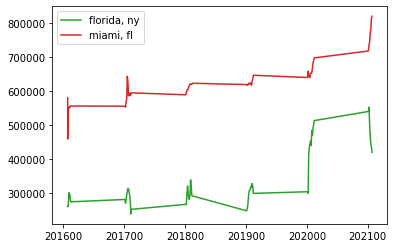

In [100]:
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='florida, ny', :],label='florida, ny', color='tab:green')
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='miami, fl', :], label='miami, fl', color='tab:red')

plt.legend()
plt.show()

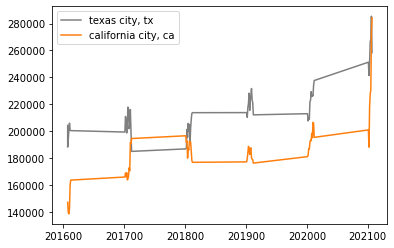

In [102]:
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='texas city, tx', :],label='texas city, tx',color='tab:grey')
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='california city, ca', :],label='california city, ca',color='tab:orange')
plt.legend()
plt.show()

In [103]:
df_zip.corr()['average_listing_price']

active_listing_count     0.102450
average_listing_price    1.000000
total_listing_count      0.096601
pending_ratio            0.031860
covid_time               0.077222
Name: average_listing_price, dtype: float64

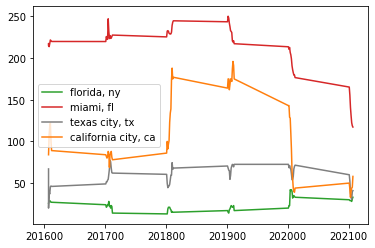

In [107]:
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='florida, ny', :],label='florida, ny', color='tab:green')
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='miami, fl', :], label='miami, fl', color='tab:red')
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='texas city, tx', :],label='texas city, tx',color='tab:grey')
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='california city, ca', :],label='california city, ca',color='tab:orange')

plt.legend()
plt.show()

In [115]:
df3 = df[['postal_code','month_date_yyyymm','active_listing_count','average_listing_price',
          'total_listing_count','pending_ratio']]
df3 = df3.drop(913083)

In [116]:
df3['covid_time'] = np.where(df3['month_date_yyyymm'].astype(np.int64) >= 201903, 1, 0)
df3['month_date_yyyymm_int'] = df3['month_date_yyyymm'].astype(np.int64)
df3['postal_code_int'] = df3['postal_code'].astype(np.int64)


In [117]:
X = df3.drop('average_listing_price', axis=1)
y = df3['average_listing_price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [118]:
test_score

0.03178081555657464

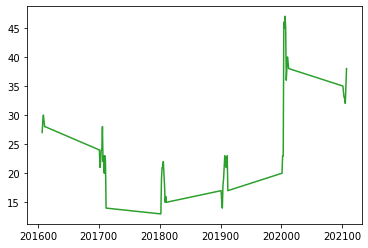

In [60]:
plt.plot('month_date_yyyymm_int', 'total_listing_count', data=df_zip.loc[df_zip.zip_name=='florida, ny', :],color='tab:green')


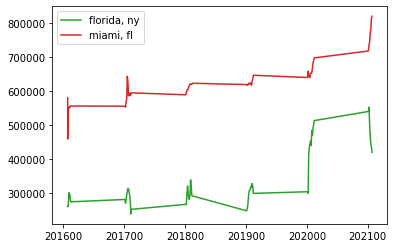

In [84]:
plt.plot('month_date_yyyymm_int', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='florida, ny', :],label='florida, ny', color='tab:green')
plt.plot('month_date_yyyymm_int', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='miami, fl', :], label='miami, fl', color='tab:red')

plt.legend()
plt.show()

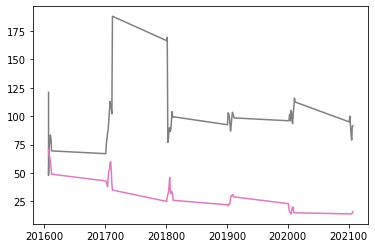

In [72]:
plt.plot('month_date_yyyymm_int', 'total_listing_count', data=df_zip.loc[df_zip.zip_name=='texas city, tx', :],color='tab:grey')
plt.plot('month_date_yyyymm_int', 'total_listing_count', data=df_zip.loc[df_zip.zip_name=='smallwood, ny', :],color='tab:pink')

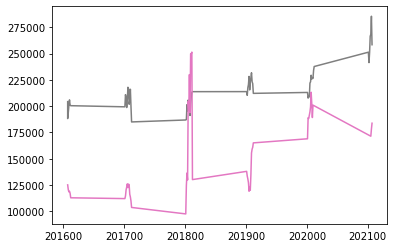

In [69]:
plt.plot('month_date_yyyymm_int', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='texas city, tx', :],color='tab:grey')
plt.plot('month_date_yyyymm_int', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='smallwood, ny', :],color='tab:pink')

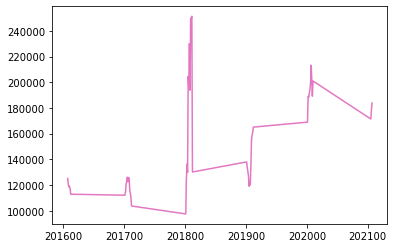

In [65]:
plt.plot('month_date_yyyymm_int', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='smallwood, ny', :],color='tab:pink')

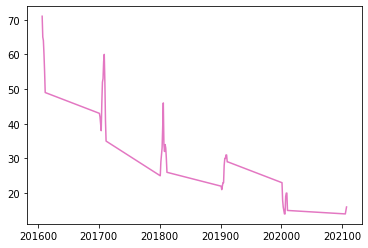